In [ ]:
from loader import PR_Dataset
import pandas as pd 
from cfg import *
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
from loader import ImgPad
from torchvision import transforms as T


# Img Statistic

In [ ]:
test_aug = T.Compose([
    ImgPad(IMAGE_SIZE), 
    T.Resize((IMAGE_SIZE, IMAGE_SIZE)), 
    T.ToTensor(), 
])

# ['T1', 'T1c', 'T2', 'Flair']
dtype = 'Flair'
df = pd.read_excel(xls_file, sheet_name='Sheet2')
ds = PR_Dataset(df, dtype, eval_mode=True)
mean, std, sz = 0, 0, ds.__len__()

for i in range(sz):
    img= ds.features[i]['img']
    img = test_aug(img)
    img = np.expand_dims(img, 2)
    img = np.moveaxis(img, -1, 0)
    img = torch.tensor(img, dtype=torch.float32)
    
    mean += img.mean()
    std += img.std()

print(f'mean: ', mean/(sz))
print('std : ', std/(sz))
print('---------------------------')

[0.64772727 2.19230769]
Flair | 56 images found
mean:  tensor(0.1038)
std :  tensor(0.1031)
---------------------------


# Image Vis

[0.64772727 2.19230769]
T1 | 56 images found


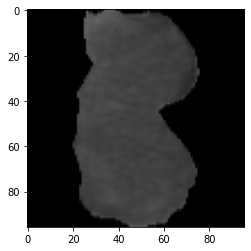

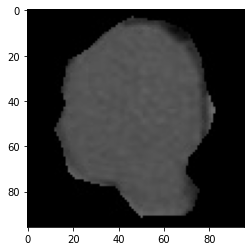

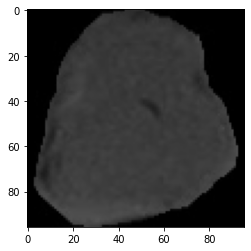

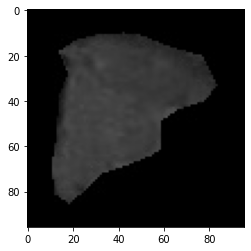

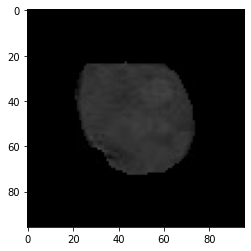

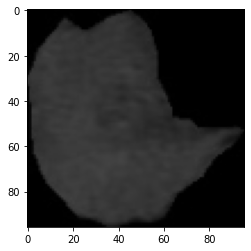

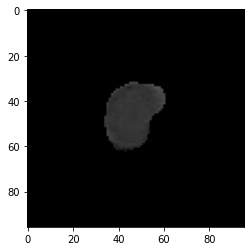

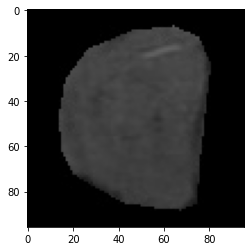

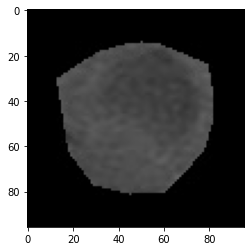

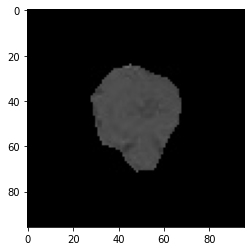

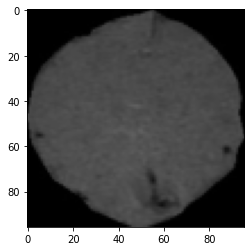

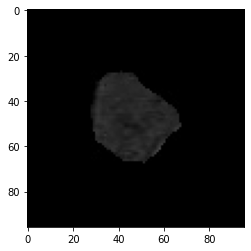

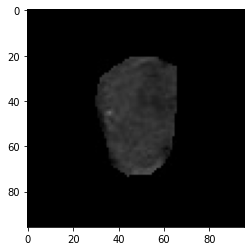

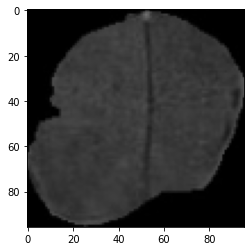

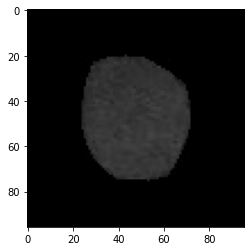

In [ ]:

pad_and_resize = T.Compose([
    ImgPad(IMAGE_SIZE), 
    T.Resize((IMAGE_SIZE, IMAGE_SIZE)), 
])
ds = PR_Dataset(df, 'T1', eval_mode=False)
columns, rows = 4, 5
fig = plt.figure(figsize=(8, 8))

for i in range(1, columns*rows +1):
    
    # img = ds.__getitem__(0)['img'].numpy()
    img = ds.features[i]['img']
    img = pad_and_resize(img)
    # img = img*255.0
    # img = np.moveaxis(img, 0, -1)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()